# Homework 12

## Due 4PM Nov 30, 2020

## Problem 1: Women's 800 Meter

Which countries have done best at the Women's 800 Meter?

Gather the data from the World Records CSV, use a Dictionary to count the records, and create a bar chart showing the relative number of records per country.  Sort the countries alphabetically, and make sure we can read the country names.  

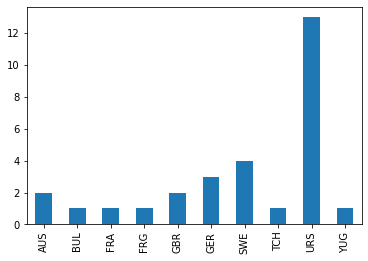

In [32]:
filename = "WorldRecords.csv"

# read in data
df = pd.read_csv(filename)

# filter to women's 800m 
df2 = df[(df['Event'] =='Womens 800m')]

nat_counts = df2['Nationality'].value_counts().sort_index()
nat_counts.plot.bar()

## Problem 2: Regular Expressions

We have used Beautiful Soup to scrape a website.

Let's see what we can do with just urlib and Regular Expressions

Take the DCE website, and find all the links.  (Be sure to compare notes with Beautiful Soup)

In [36]:
import urllib.request
import string
import re

def find_links(url):
    """Returns the first URL and link txt on page"""

    # read in url text
    with urllib.request.urlopen(url) as f:
        text = f.read().decode('utf-8')

    re_links = re.findall('<a.*/a>', text)

    return re_links

## Unit Test

In [32]:
website = 'https://www.extension.harvard.edu'

In [37]:
results = find_links(website)
print(len(results))
for link in results:
    print(link)

58
<a href="#main-menu" class="skip">Jump to navigation</a>
<a href="#main-content" class="skip">Skip to Main Content</a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>
<a href="/academics">Academics</a>
<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>
<a href="/resources-policies">Resources &amp; Policies</a>
<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>
<a href="/request-information" title="">Get Info</a>
<a href="/about-us" title="">About</a>
<a href="/academic-calendar" title="">Calendar</a>
<a href="/compl

In [45]:
import requests
from bs4 import BeautifulSoup

"prettify print the html of a given url"

url = "https://www.extension.harvard.edu"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, 'html.parser')
pretty_soup = soup.prettify()

links = soup.find_all("a")

print("link:", links[0])
print("results:", results[0])

# print("Number of links:",len(links),"\n")
# for x in links:
#    print(x)


link: <a class="skip" href="#main-menu">Jump to navigation</a>
results: <a href="#main-menu" class="skip">Jump to navigation</a>


In [41]:
for x in results:
    if x not in links:
        print(x)

<a href="#main-menu" class="skip">Jump to navigation</a>
<a href="#main-content" class="skip">Skip to Main Content</a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>
<a href="/academics">Academics</a>
<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>
<a href="/resources-policies">Resources &amp; Policies</a>
<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>
<a href="/request-information" title="">Get Info</a>
<a href="/about-us" title="">About</a>
<a href="/academic-calendar" title="">Calendar</a>
<a href="/completi

## Compare your program with the results from Beautiful Soup

Do you get the same number of links?  If not:

1) How many do you miss?

2) Can you explain why you miss them?

3) Can you fix it?

## Problem 3: File Name Generator

Write a Generator that takes a directory, a file extension, and, optionally, a file size, and then yields a stream of tuples, (path, filename) so that path/filename is a legal path to a file that meets the conditions.

Use os.walk(dir) to create a generator that gives all files and directories below dir.  Call this generator, and yield files (not directories) with the right extension and a file size greater than the given size.   

We have three unit tests: demonstrate that you can walk recursivly through two or more directories, and that you can filter by file extension and filter by extension and by size. 

In [ ]:
# Find all files in the directory or below that end with the given extension and are larger than size
def find_files_gen(directory, extension, size = 0):
    pass


def collatz(n):
    "generates the Collatz sequence"
        
    if n == 1:
        raise StopIteration
    while n != 1:
        yield n
        n = (n * 3 + 1) if n % 2 else (n // 2)
    yield 1


## Unit Test

In [ ]:
# Show recursive search.  Make sure we can see at least two directories of files
gen = find_files_gen('..', 'ps' )

for path, filename in gen:
    print(path, filename)

In [ ]:
# Show all notebooks in this directory
gen = find_files_gen('.', '.ipynb')

for path, filename in gen:
    print(path, filename)

In [ ]:
# Show all notebooks in this directory with at least 1K bytes
gen = find_files_gen('.', '.ipynb', 1000)

for path, filename in gen:
    print(path, filename)

## Problem 4: Sorting Employees

We wish to take an unordered list of Employees, and get a list sorted by Company and Id.

Everyone who works at 'Springfield Department of Motor Vehicles' should be in one group. 
Everyone who works at 'Springfield Nuclear Power' would be in another group, later in the list, 
and everyone who works from the Mafia would be in a group earlier in the list. 
Within each group, we want to see the low ID numbers before this high ones.

For this problem, we do not want you to write a sorting program. You will use Python's sort.   
You just need to define the magic method dunder lt(), less than, for the class Employee. 

Once you have defined dunder lt(), calling Python's sorted() on a list of Employees will return a sorted list.

### Add to the cell below

In [ ]:
class Person:

    def __init__(self, first, last):
        self.firstname = first.capitalize()
        self.lastname = last.capitalize()

    def __str__(self):
        return self.firstname + " " + self.lastname


class Employee(Person):

    def __init__(self, first, last, company, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.id = id
        self.company = company

    def __str__(self):
        # Call Superclass to dispaly common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.company

## Unit Test

In [ ]:
lst = [
    Employee('Homer', 'Simpson', 'Springfield Nuclear Power', 1005),
    Employee('Barney', 'Gumble', 'Plow King', 1),
    Employee('Clancy', 'Wiggum', 'Police Department', 1),
    Employee('Edna', 'Krabapple', 'Springfield Elementary School', 39),
    Employee('Seymour', 'Skinner', 'Springfield Elementary School', 1),
    Employee('Charles', 'Burns', 'Springfield Nuclear Power', 1),
    Employee('Waylon', 'Smithers', 'Springfield Nuclear Power', 2),
    Employee('Patty', 'Bouvier', 'Springfield Department of Motor Vehicles', 39),
    Employee('Selma', 'Bouvier', 'Springfield Department of Motor Vehicles', 38),
    Employee('Robert', 'Terwilliger', 'Channel 6', 31),
    Employee('Herschel', 'Krustofsky', 'Channel 6', 2),
    Employee('Lois', 'Pennycandy', 'Channel 6', 46),
    Employee('Johnny', 'Cevasco', 'Mafia', 2),
    Employee('Fat', 'Tony', 'Mafia', 1),
    Employee('Max', 'Legman', 'Mafia', 3 ),
    Employee('Louie', 'Walters', 'Mafia', 4)
    ]

for emp in lst:
    print(emp)
    
print('==========================')

# Sort the people
lst = sorted(lst)

# Now check that the list is sorted
for first, second in zip(lst[:-1], lst[1:]):
    assert (first.company, first.id) < (second.company, second.id)

for emp in lst:
    print(emp)
    
print("\n\tSuccess!")

## Problem 5: Finding Repeats

DNA has a great deal of structure.  DNA often contains repeats: this is a fascinating area that we are not going to explore.  Investigate 'transposons'.  
    
Write a program that finds the longest repeat in a sequence of DNA stored in a FASTA file.

There will be a single string of DNA in the file. The first line has a description of the contents,
while the remainder is a string of A, C, G, and T with line breaks.  Be sure to remove the line breaks.  

Here is a sample run on pKLMF-FX.fasta

```python
10089
(5535, 5541, 15)
CACGGGCACGGGCAC
CACGGGCACGGGCAC
CPU times: user 191 ms, sys: 2.49 ms, total: 193 ms
Wall time: 193 ms
```

In [ ]:
# Read contents of fasta file with a single sequence
# Skip the first line, and return a string holding the contents
def read_fasta_file(filename: str) -> str:
    pass

In [ ]:
# Take a string and look for the longest repeat
# Return a tuple: (pos1, pos2, length) or None if there are no repeats
#    pos1 != pos2 and text[pos1:pos1+length)] == text[pos2:pos2+length]
#
def longest_repeat(text):
    pass

## Unit tests

In [ ]:
%%time
filename = 'pKLMF-FX.fasta'

text = read_fasta_file(filename)
print(len(text))               
assert len(text) == 10089

tup = longest_repeat(text) 

print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

In [ ]:
%%time
filename = 'pACYC184.fasta'        # An EColi plasmid cloning vector

# See https://www.snapgene.com/resources/plasmid-files/?set=basic_cloning_vectors&plasmid=pACYC184
    

text = read_fasta_file(filename)
print(len(text))                   # DNA is 4289 Bytes long: remove first line and \n
assert len(text) == 4289 

tup = longest_repeat(text) 
print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert tup[2] == 94
assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

## Extra credit: Find the longest repeat in EColi

In [ ]:
%%time
filename = 'EColi.fasta'

text = read_fasta_file(filename)
print(len(text))
assert len(text) == 4641729

tup = longest_repeat(text)  
print(tup)

assert len(tup) == 3
assert isinstance(tup, tuple)
assert len(text) == 4641729 

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]